## 0. Simulate dataset

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
np.random.seed(42)
sample_size = 1000
X =  np.random.rand(sample_size,2)
noice = np.random.randn(sample_size,1)
y = 3*X[:, [0]] + 5*X[:, [1]] + 3 + noice

X = np.c_[np.ones(sample_size), X]

## 1. Gradient descent - learning rate

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

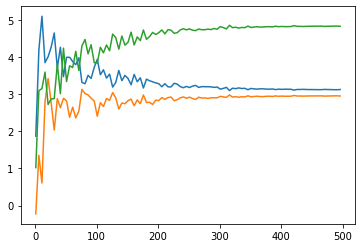

In [178]:
def gradient_decent(X, y, learning_rate = 0.1, epochs = 100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2/m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
    
    return theta


epochs = range(1, 500, 5)
test = np.array([gradient_decent(X, y, epochs = epoch).reshape(-1) for epoch in epochs])
plt.plot(epochs, test)